Dealing with different activation functions:

In [1]:
# Import Statements:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification

# List of multiple activation functions:
activation_functions = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Creating the classification dataset:
x_train, y_train = make_classification(n_samples=1000, n_features=60, n_classes=2, random_state=1024)
print("Training Dimensions", x_train.shape, y_train.shape)

x_test, y_test = make_classification(n_samples=10, n_features=60, n_classes=2, random_state=231)
print("Test Dimensions", x_test.shape, y_test.shape)


Training Dimensions (1000, 60) (1000,)
Test Dimensions (10, 60) (10,)


In [2]:
# User-defined function to create a model with the given activation function:
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(100, input_shape=(60,), activation=activation_function))
    model.add(Dense(10, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile()
    # Compiling the model:
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [3]:
# Running our model for every activation function:
model_metrics = {}

for activation_function in activation_functions:
    print('Building a model with the', activation_function, 'activation function')
    model = create_model(activation_function)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=0)
    model_metrics[activation_function] = history

Building a model with the relu activation function
Building a model with the leaky_relu activation function
Building a model with the sigmoid activation function
Building a model with the tanh activation function


In [4]:
model_metrics

{'relu': <keras.callbacks.History at 0x216867eaf40>,
 'leaky_relu': <keras.callbacks.History at 0x21687ffd5e0>,
 'sigmoid': <keras.callbacks.History at 0x216986a26d0>,
 'tanh': <keras.callbacks.History at 0x216a8185580>}

In [5]:
model_metrics = { activation_function:metric.history['val_loss'] for activation_function, metric in model_metrics.items()}
model_metrics

{'relu': [0.7022806406021118,
  0.7129681706428528,
  0.778867244720459,
  0.8100436329841614,
  0.8527237176895142,
  0.8611592054367065,
  0.8940156698226929,
  0.9351881146430969,
  0.9565418362617493,
  0.9799801111221313],
 'leaky_relu': [0.8511912226676941,
  0.9073499441146851,
  0.9476418495178223,
  0.9573987126350403,
  0.9915250539779663,
  0.9644073247909546,
  1.0485951900482178,
  1.046303629875183,
  1.0607330799102783,
  1.0833646059036255],
 'sigmoid': [0.6673643589019775,
  0.6657456159591675,
  0.6616894006729126,
  0.6620763540267944,
  0.6633335947990417,
  0.673573911190033,
  0.6996126770973206,
  0.7169848680496216,
  0.7465923428535461,
  0.7728911638259888],
 'tanh': [0.6174003481864929,
  0.6272603273391724,
  0.7249354720115662,
  0.7992593050003052,
  0.8724481463432312,
  0.9499832391738892,
  0.9054082036018372,
  0.8914161920547485,
  0.9403918385505676,
  0.9440397024154663]}

In [7]:
model_metrics_df = pd.DataFrame(model_metrics)
model_metrics_df

,relu,leaky_relu,sigmoid,tanh
0,0.702281,0.851191,0.667364,0.617400
1,0.712968,0.907350,0.665746,0.627260
2,0.778867,0.947642,0.661689,0.724935
3,0.810044,0.957399,0.662076,0.799259
4,0.852724,0.991525,0.663334,0.872448
5,0.861159,0.964407,0.673574,0.949983
6,0.894016,1.048595,0.699613,0.905408
7,0.935188,1.046304,0.716985,0.891416
8,0.956542,1.060733,0.746592,0.940392
9,0.979980,1.083365,0.772891,0.944040


<AxesSubplot:title={'center':'Loss per activation function:'}>

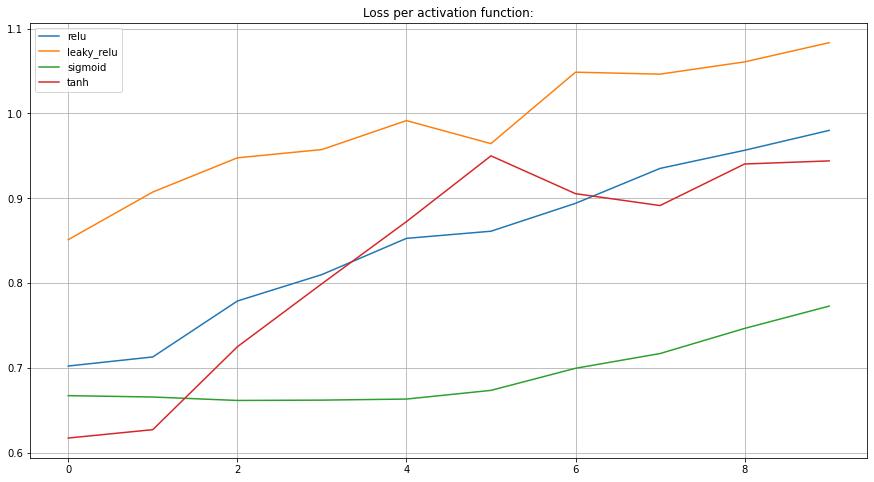

In [11]:
model_metrics_df.plot(figsize=(15, 8), grid=True, title="Loss per activation function:")

Sigmoid activation function has the lowest validation loss.